In [10]:
import pandas as pd
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


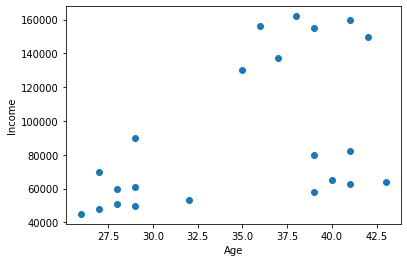

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [13]:
km=KMeans(n_clusters=3)
km.fit(df[['Age','Income($)']])

KMeans(n_clusters=3)

In [15]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [16]:
km.feature_names_in_

array(['Age', 'Income($)'], dtype=object)

In [29]:
km.predict(df[['Age','Income($)']])

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

## Preprocessing using min max scaler 

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


## Elbow method

In [43]:
sse=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

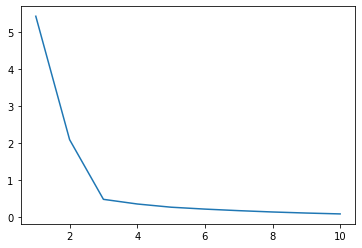

In [44]:
plt.plot(range(1,11),sse)